MACHINE PROBLEM 3 KNN CLASSIFIER ON BREAST CANCER DIAGNOSI DATASET

Data Exploration and Preprocessing

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('/content/Breast-Cancer-Diagnosis-Dataset-with-Tumor-Characteristics.csv')
# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())



First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

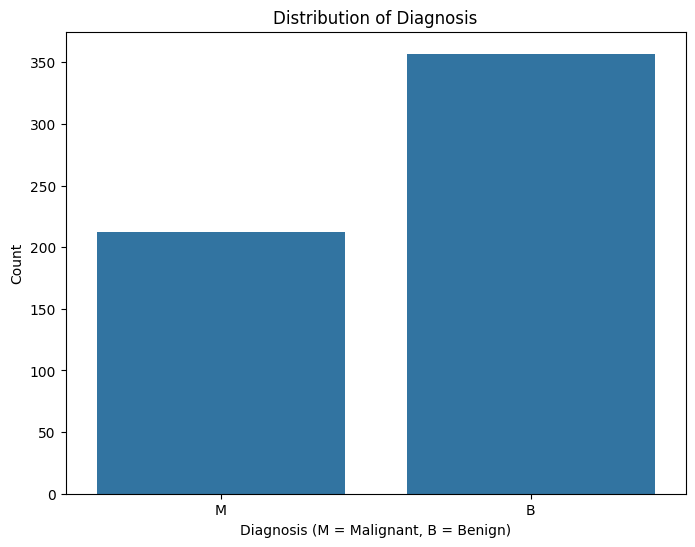

In [63]:
# Visualize the distribution of the diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

In [64]:
# Check for missing values
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [65]:
# Basic statistics of the dataset
print("\nBasic statistics:")
print(data.describe())


Basic statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064    

Convert Categorical Target Variable

In [66]:
# Convert diagnosis to numerical form
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

Normalize or Scale the data

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('diagnosis', axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.drop('diagnosis', axis=1).columns)
data_scaled['diagnosis'] = data['diagnosis']

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Split the Data into Training and Testing Sets

In [68]:
scaler = StandardScaler()
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_scaled = scaler.fit_transform(X)

!pip install sklearn
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X_scaled = imputer.fit_transform(X_scaled)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 5. Evaluate the model's performance
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LOGISTIC REGRESSION MODEL

In [69]:
# 4. Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, y_pred) # Use y_pred instead of y_pred_knn
knn_precision = precision_score(y_test, y_pred) # Use y_pred instead of y_pred_knn
knn_recall = recall_score(y_test, y_pred) # Use y_pred instead of y_pred_knn
knn_f1 = f1_score(y_test, y_pred) # Use y_pred instead of y_pred_knn
knn_confusion_matrix = confusion_matrix(y_test, y_pred) # Use y_pred instead of y_pred_knn

print("KNN Model Performance:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-score: {knn_f1:.2f}")
print("KNN Confusion Matrix:")
print(knn_confusion_matrix)
print(classification_report(y_test, y_pred)) # Use y_pred instead of y_pred_knn

# Evaluate Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_confusion_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {log_reg_accuracy:.2f}")
print(f"Precision: {log_reg_precision:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"F1-score: {log_reg_f1:.2f}")
print("Logistic Regression Confusion Matrix:")
print(log_reg_confusion_matrix)
print(classification_report(y_test, y_pred_log_reg))

KNN Model Performance:
Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1-score: 0.93
KNN Confusion Matrix:
[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Logistic Regression Model Performance:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1-score: 0.96
Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

